### 단순 선형회귀

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 아버지와 아들의 키 - Galton

In [2]:
df = pd.read_csv('data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌
- 컬럼명을 Father, Son 으로 변경
- 단위(inch -> cm) 변경

In [3]:
# Filtering
df = df[df.Gender == 'M']
df.head(3)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4


In [4]:
df = df[['Father', 'Height']]
# 컬럼명 변경
df.columns = ['Father', 'Son']
df.head(3)

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [5]:
# 단위 변경
df = df * 2.54
df.head(3)

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150


- 산점도 구하기

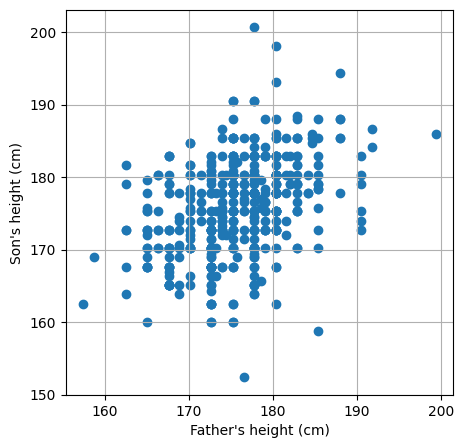

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(df.Father, df.Son)
plt.xlabel("Father's height (cm)" )
plt.ylabel("Son's height (cm)" )
# plt.title('Father vs. Son', fontsize=15)
plt.grid()
plt.show()

- 회귀선 구하고 그리기
    - np.linalg.lstsq()     # 최소 자승법(Least square)
    - np.polyfit()

In [11]:
weight, bias = np.polyfit(df.Father, df.Son, 1)     # X, Y, degree(차수)
weight, bias

(0.4477479176030284, 97.17763700739303)

In [12]:
# 2차 회귀식
np.polyfit(df.Father, df.Son, 2)

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [13]:
df.Father.max(), df.Father.min()

(199.39000000000001, 157.48)

In [14]:
# 회귀선(직선)
xs = np.array([157, 200])
ys = xs * weight + bias
ys

array([167.47406007, 186.72722053])

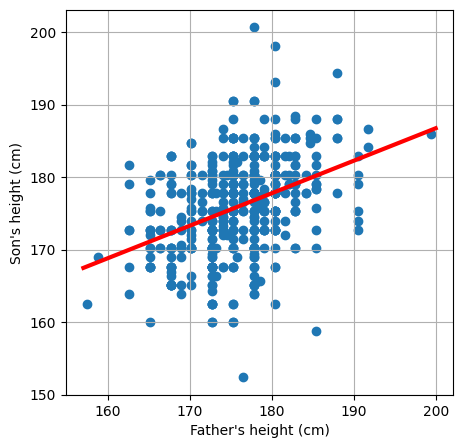

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(df.Father, df.Son)
plt.plot(xs, ys, lw=3, c='red')
plt.xlabel("Father's height (cm)" )
plt.ylabel("Son's height (cm)" )
# plt.title('Father vs. Son', fontsize=15)
plt.grid()
plt.show()

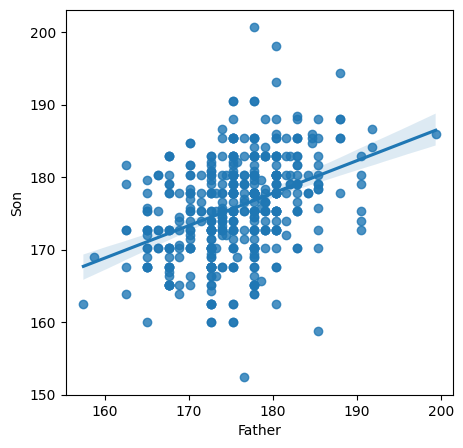

In [17]:
plt.figure(figsize=(5,5))
sns.regplot(x='Father', y='Son', data=df)
plt.show()

- Scikit-learn 으로 회귀식 구하기

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [20]:
# X 데이터의 차원을 2로 만들어주어야 함
X = df.Father.values.reshape(-1, 1)
y = df.Son.values
X.shape, y.shape

((465, 1), (465,))

In [21]:
# 학습
lr.fit(X, y)

LinearRegression()

In [22]:
# weight, bias
lr.coef_, lr.intercept_
# np.polyfit()으로 구한 값: 0.4477479176030284, 97.17763700739303

(array([0.44774792]), 97.17763700739333)

- 평가 - R Squared

In [23]:
lr.score(X, y)      # 1 - Sum of Square Error / Sum of Square Total

0.15312927478307026

In [25]:
from sklearn.metrics import r2_score
pred = lr.predict(X)
r2_score(y, pred)

0.15312927478307026

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, pred)

37.756127990309636